In [1]:
%matplotlib inline

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

In [8]:
def cropFace(image):
    faceClassifier = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_alt.xml')
    faces = faceClassifier.detectMultiScale(image)
    #get first face coordinates
    xFace, yFace, wFace, hFace = faces[0]
    croppedFace = image[yFace:yFace+hFace, xFace:xFace+wFace]
    return croppedFace

In [59]:
img = cv2.imread('images/test.png', 0)
img = cropFace(img)
S = np.matrix([[ 5,  5,  5],
               [-3,  0, -3],
               [-3, -3, -3]
              ])
SE = np.matrix([[ 5,  5, -3],
                [ 5,  0, -3],
                [-3, -3, -3]
               ])
E = np.matrix([[5, -3, -3],
               [5,  0, -3],
               [5, -3, -3]
              ])
NE = np.matrix([[-3, -3, -3],
                [ 5,  0, -3],
                [ 5,  5, -3]
               ])
N = np.matrix([[-3, -3, -3],
               [-3,  0, -3],
               [ 5,  5,  5]
              ])
NW = np.matrix([[-3, -3, -3],
                [-3,  0,  5],
                [-3,  5,  5]
               ])
W = np.matrix([[-3, -3, 5],
               [-3,  0, 5],
               [-3, -3, 5]
              ])
SW = np.matrix([[-3,  5,  5],
                [-3,  0,  5],
                [-3, -3, -3]
               ])

res1 = convolve(img, N)
res2 = convolve(img, NE)
res3 = convolve(img, E)
res4 = convolve(img, SE)
res5 = convolve(img, S)
res6 = convolve(img, SW)
res7 = convolve(img, W)
res8 = convolve(img, NW)

# plt.imshow(res1, cmap='gray')
# plt.show()
# plt.imshow(res2, cmap='gray')
# plt.show()
# plt.imshow(res3, cmap='gray')
# plt.show()
# plt.imshow(res4, cmap='gray')
# plt.show()
# plt.imshow(res5, cmap='gray')
# plt.show()
# plt.imshow(res6, cmap='gray')
# plt.show()
# plt.imshow(res7, cmap='gray')
# plt.show()
# plt.imshow(res8, cmap='gray')


[[ 75  59  60 ... 172 170 162]
 [ 52  46  51 ... 167 172 168]
 [ 51  51  54 ... 162 174 176]
 ...
 [ 55  52  49 ...  62  49  54]
 [ 54  50  52 ...  55  52  48]
 [ 65  48  52 ...  51  56  54]]


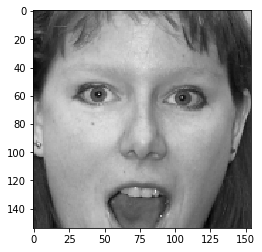

[[ 20  23  21 ...  30  13   7]
 [124 168 105 ...  73 137 133]
 [ 52  98 233 ... 235 201 197]
 ...
 [116 226 233 ... 229 227 195]
 [ 52  98 233 ... 233 237 197]
 [112  97 240 ... 240 208 193]]


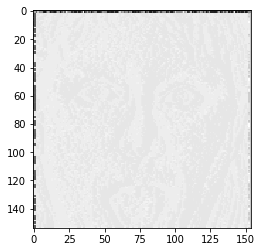

In [61]:
print(img)
plt.imshow(img, cmap='gray')
plt.show()
def hvnLBP(image):
    def hLBP(matrix):
        mat = matrix.copy()
        for i in range(mat.shape[1]):
            maxNum = np.amax(mat[i, :])
            for j in range(mat.shape[0]):
                mat[i, j] = 1 if mat[i, j] == maxNum and maxNum != 0 else 0
        return mat
            
        
    def vLBP(matrix):
        mat = matrix.copy()
        for i in range(mat.shape[0]):
            maxNum = np.amax(mat[:, i])
            for j in range(mat.shape[1]):
                mat[j, i] = 1 if mat[j, i] == maxNum and maxNum != 0 else 0
        return mat
    def generatePattern(matrix):
        str = '%d%d%d%d%d%d%d%d'%(matrix[0, 0], matrix[0, 1], matrix[0, 2], matrix[1, 2],
                                  matrix[2, 2], matrix[2, 1], matrix[2, 0], matrix[1, 0])
        return str
    
    height, width = image.shape
    newImage = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            if i == 0: # top border
                if j == 0: # top left corner
                    row1 = np.array([0, 0, 0])
                    row2 = np.array([0, -1, img[i][j+1]])
                    row3 = np.hstack((np.array([0]), img[i+1][j:j+2]))
                elif j == width -1: # top right corner
                    row1 = np.array([0, 0, 0])
                    row2 = np.array([img[i][j-1], -1, 0])
                    row3 = np.hstack((img[i+1][j-1:j+1], np.array([0])))
                else:
                    row1 = np.array([0, 0, 0])
                    row2 = np.array([img[i][j-1], -1, img[i][j+1]])
                    row3 = np.array(img[i+1][j-1:j+2])
                    
            elif i == height -1: # bottom border
                if j == 0: # bottom left corner
                    row1 = np.hstack((np.array([0]), img[i-1][j:j+2]))
                    row2 = np.array([0, -1, img[i][j+1]])
                    row3 = np.array([0, 0, 0])
                elif j == width -1: # bottom right corner
                    row1 = np.hstack((img[i-1][j-1:j+1], np.array([0])))
                    row2 = np.array([img[i][j-1], -1, 0])
                    row3 = np.array([0, 0, 0])
                else:
                    row1 = np.array(img[i-1][j-1:j+2])
                    row2 = np.array([img[i][j-1], -1, img[i][j+1]])
                    row3 = np.array([0, 0, 0])                    
            else:
                if j == 0: # left border
                    row1 = np.hstack((np.array([0]), img[i-1][j:j+2]))
                    row2 = np.hstack((np.array([0]), img[i][j:j+2]))
                    row2[1] = -1
                    row3 = np.hstack((np.array([0]), img[i+1][j:j+2]))
                elif j == width -1: # right border
                    row1 = np.hstack((img[i-1][j-2:j], np.array([0])))
                    row2 = np.hstack((img[i][j-2:j], np.array([0])))
                    row2[1] = -1
                    row3 = np.hstack((img[i+1][j-2:j], np.array([0])))
                else:
                    row1=img[i-1][j-1:j+2]
                    row2=img[i][j-1:j+2]
                    row2[1] = -1
                    row3=img[i+1][j-1:j+2]
            mat = np.matrix([row1, row2, row3])
            hv = np.maximum(hLBP(mat), vLBP(mat))
            newImage[i, j] = int(generatePattern(hv), 2)
    return newImage
#             print(mat)
#             print(newImage)

            
res = hvnLBP(res1)
print(res)
plt.imshow(res, cmap='gray')
plt.show()